In [1]:
import pandas as pd
import numpy as np 
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib.pylab import rcParams
seed = 7
np.random.seed(seed)
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 10, 5
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [2]:
os.chdir("C:\Vishakha\Machine Learning\Assignment_2")
Dataset1 = pd.read_csv("Fb_Data.csv")
Dataset1.head()

,PagePopularitylikes,PageCheckin,Pagetalking about,PageCategory,MinCC1,MaxCC1,AverageCC1,MedianCC1,SDCC1,MinCC2,...,PostpublishedFriday,PostpublishedSaturday,BaseDateTimeSunday,BaseDateTimeMonday,BaseDateTTuesday,BaseDateTimeWednesday,BaseDateTimeThursday,BaseDateTimeFriday,BaseDateTimeSaturday,TargetVariable
0,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
Dataset1 = pd.DataFrame(Dataset1)
Dataset1.columns = Dataset1.columns.to_series().apply(lambda x: x.strip())
Dataset1['New_Target'] = [1 if each > 0 else 0 for each in Dataset1['TargetVariable']]
y = Dataset1['New_Target'].values
X = Dataset1.drop(['New_Target','TargetVariable'],axis = 1)


In [4]:
#X = Dataset1.drop(['TargetVariable'],axis = 1)
mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)

# K- Means Implementation -  Dataset1

In [39]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,40)
for k in K:
    km = KMeans(n_clusters=k,random_state = 131)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

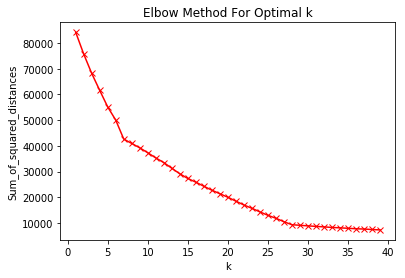

In [40]:
plt.plot(K, Sum_of_squared_distances, 'rx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=7,random_state = 131)  
kmeans_model = kmeans.fit(data_transformed) 
labels_pred =  kmeans.predict(data_transformed)
labels = kmeans_model.labels_


In [8]:
print(kmeans.cluster_centers_)  

[[ 2.99959409e-03  4.00033110e-03  8.89589258e-03  2.16178407e-01
   6.99889304e-04  1.67405491e-01  2.53109932e-02  1.60297042e-02
   6.61631408e-02  1.07938265e-04  1.16367381e-01  1.30769208e-02
   4.81678253e-03  4.15007767e-02  1.70800027e-05  1.15895411e-01
   2.89147584e-02  6.78475560e-03  5.41566574e-02  8.13181529e-04
   1.61610527e-01  2.92272628e-02  1.87037243e-02  6.22069751e-02
   4.66512857e-01  2.22406292e-01  1.71487401e-01  1.69083782e-01
   4.64679783e-02  2.29225968e-02  1.00165146e-02  1.14417046e-02
   2.17512045e-02  3.30963238e-01  4.83006912e-01  6.89778224e-03
   9.80203919e-04  0.00000000e+00  9.77454557e-01  1.00000000e+00
   6.66133815e-15  4.21884749e-15  1.43496326e-14 -1.19348975e-15
   1.00475184e-14 -1.18238752e-14  1.66282642e-01  3.26420891e-01
   3.19508449e-01  1.87788018e-01 -5.55111512e-17 -3.94129174e-15
   1.49047441e-14]
 [ 2.68638274e-03  4.40731085e-03  6.82001374e-03  2.24759427e-01
   9.10587742e-04  1.57324718e-01  2.41295455e-02  1.5333

In [9]:
print(labels_pred)

[5 1 2 ... 1 0 1]


In [10]:
from sklearn import metrics
metrics.homogeneity_score(y, labels_pred)

0.0001303841265065853

In [11]:
metrics.completeness_score(y, labels_pred) 

4.6196472666080276e-05

In [12]:
metrics.adjusted_rand_score(y, labels_pred)

2.783154990108196e-05

In [13]:
metrics.adjusted_mutual_info_score(y, labels_pred)

9.404861648094126e-06

In [14]:
metrics.normalized_mutual_info_score(y, labels_pred)  

7.760983659467542e-05

In [15]:
metrics.silhouette_score(data_transformed, labels, metric='euclidean')

0.3247151683620217

# Expectation Maximization Implemenation - Dataset1

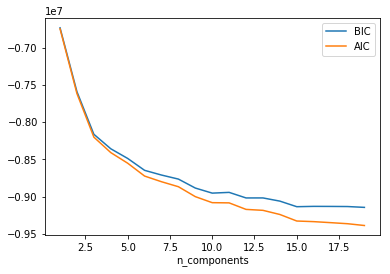

In [215]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GMM
n_components = np.arange(1, 20)
models = [GMM(n, covariance_type='full', random_state=131).fit(data_transformed)
          for n in n_components]

plt.plot(n_components, [m.bic(data_transformed) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data_transformed) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [ ]:
gmm = GMM(n_components=12).fit(data_transformed)
labels_gmm = gmm.predict(data_transformed)

In [73]:
probs = gmm.predict_proba(data_transformed)
print(probs[:5].round(3))

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [74]:
metrics.homogeneity_score(y, labels_gmm)

0.05232138992754115

In [75]:
metrics.completeness_score(y, labels_gmm)

0.015124580054353595

In [76]:
metrics.adjusted_rand_score(y, labels_gmm)

0.008895115715047204

In [77]:
metrics.adjusted_mutual_info_score(y, labels_gmm)

0.015070371572196841

In [78]:
metrics.normalized_mutual_info_score(y, labels_gmm)

0.02813074919930406

In [79]:
metrics.silhouette_score(data_transformed, labels_gmm, metric='euclidean')

0.35755159155784644

# Decision Tree - Dataset1

In [11]:
Dataset1['New_Target'] = [1 if each > 0 else 0 for each in Dataset1['TargetVariable']]
y = Dataset1['New_Target'].values
x = Dataset1.drop(['New_Target','TargetVariable'],axis = 1)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)  


,PagePopularitylikes,PageCheckin,Pagetalking about,PageCategory,MinCC1,MaxCC1,AverageCC1,MedianCC1,SDCC1,MinCC2,...,PostpublishedThursday,PostpublishedFriday,PostpublishedSaturday,BaseDateTimeSunday,BaseDateTimeMonday,BaseDateTTuesday,BaseDateTimeWednesday,BaseDateTimeThursday,BaseDateTimeFriday,BaseDateTimeSaturday
count,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,...,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000
mean,0.002858,0.004277,0.007430,0.220242,0.000774,0.158125,0.024272,0.015469,0.062743,0.000186,...,0.147187,0.148583,0.138605,0.147459,0.133803,0.132475,0.147459,0.148515,0.145348,0.144939
std,0.015140,0.019748,0.020967,0.189692,0.011132,0.178064,0.038169,0.030818,0.076503,0.008048,...,0.354298,0.355683,0.345540,0.354569,0.340447,0.339012,0.354569,0.355616,0.352457,0.352046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000083,0.000000,0.000110,0.076190,0.000000,0.015745,0.002436,0.000854,0.007646,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000636,0.000000,0.001202,0.161905,0.000000,0.087124,0.010301,0.005126,0.032565,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.002612,0.000090,0.007843,0.295238,0.000000,0.255773,0.031216,0.017941,0.097162,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


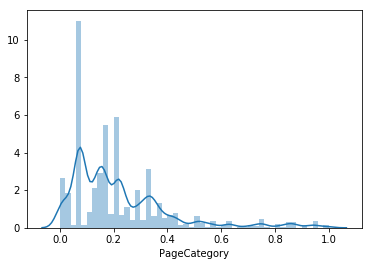

In [13]:
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])
sns.distplot(x_train['PageCategory'])
x_train.describe()

In [86]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy",random_state=0)
dtc.fit(x_train,y_train)
print("score: ", accuracy_score(y_test,dtc.predict(x_test)))

score:  0.7651172030194676


In [88]:
imp_features=dict(zip(x.columns, dtc.feature_importances_))

In [90]:
for key, value in sorted(imp_features.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

MinCC2: 0.0
MinCC3: 0.0
PostPromotionStatus: 0.0
MinCC1: 0.0008581347802829192
MinCC4: 0.000936320327889713
PostpublishedMonday: 0.0035901568923706775
PostpublishedSaturday: 0.003852512559387856
BaseDateTimeSaturday: 0.003955775151446973
PostpublishedFriday: 0.004038846156704051
PostpublishedWednesday: 0.004100521403090092
BaseDateTimeThursday: 0.004297659994001938
PostpublishedSunday: 0.004429006032773785
MedianCC5: 0.004432853181003892
PostpublishedThursday: 0.00471219906500923
BaseDateTTuesday: 0.004721856977904713
BaseDateTimeFriday: 0.004914652527758343
BaseDateTimeWednesday: 0.005205883825291492
BaseDateTimeSunday: 0.005240401286074261
AverageCC4: 0.005343133842678569
BaseDateTimeMonday: 0.0055430625508711305
PostpublishedTuesday: 0.0055699459416954766
SDCC1: 0.005804469759313964
MaxCC3: 0.006498740313357511
MedianCC2: 0.006623759857796541
SDCC4: 0.006638399608531618
HLocal: 0.0067094826586828185
AverageCC1: 0.006776263994116063
SDCC3: 0.00717517030102809
AverageCC3: 0.0075097968

# PCA implementation - Dataset1

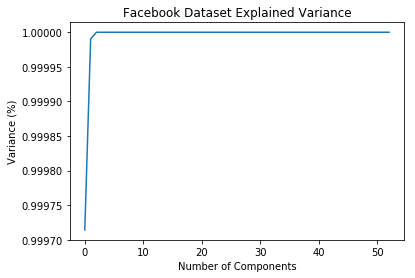

In [5]:
from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
pca = PCA().fit(X)
#X_pca = pca.transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Facebook Dataset Explained Variance')
plt.show()

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [7]:
print(pca.components_)

[[ 9.99935179e-01  1.32997744e-04  1.13849321e-02 -1.27178015e-07
   2.08788361e-07  1.23356228e-05  2.29166508e-06  1.58599582e-06
   2.28542634e-06  3.33207363e-08  1.07852207e-05  1.04930790e-06
   4.89033745e-07  1.68464340e-06  1.01319234e-08  6.66267535e-06
   7.57713988e-07  2.73623357e-07  1.21226042e-06  1.93269792e-07
   1.19583839e-05  2.12638131e-06  1.48221530e-06  2.13860704e-06
  -5.50935541e-06  1.07158061e-05  2.91593909e-07  7.20480037e-09
   2.14551623e-06  2.27044588e-06  1.01877620e-06  7.86323107e-07
   2.10403433e-06  2.32453088e-07 -4.12787930e-08 -2.46170670e-07
   4.42875085e-05 -0.00000000e+00 -2.01292076e-08  2.30904873e-10
   1.30033828e-11  3.20845755e-10 -9.38087155e-11 -2.03799168e-10
  -4.50006358e-10  1.82860232e-10 -9.39995409e-12  7.37150101e-10
  -1.91773543e-10  8.32392251e-12  1.48704570e-10 -2.27108932e-10
  -4.65896165e-10]
 [-1.13850681e-02  2.28347421e-02  9.99664466e-01 -2.26390015e-05
   3.04073845e-05  2.04314261e-03  3.69521605e-04  2.4986

In [8]:
print(pca.explained_variance_)

[4.69817348e+13 1.29806591e+10]


In [9]:
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (41949, 53)
transformed shape: (41949, 2)


# ICA Implementation 

In [10]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=53,random_state=131)
X_ICA = ica.fit_transform(X)  # Get the estimated sources
A_ = ica.mixing_ 

In [11]:
X_ICA

array([[-3.29647573e-03,  2.83323968e-03, -1.05306231e-10, ...,
         1.64904880e-02,  1.51917755e-04,  5.55262738e-04],
       [-1.51441697e-03,  2.55363319e-03, -1.51725294e-10, ...,
        -1.43455184e-02,  2.92204415e-04,  4.45614227e-04],
       [ 2.87583805e-03,  2.73550972e-03, -1.05306231e-10, ...,
         1.34836296e-03,  2.55699541e-04,  4.03387172e-04],
       ...,
       [ 6.49092651e-04, -2.63297559e-03, -6.17386581e-10, ...,
        -1.30228371e-02, -6.33253561e-03, -1.83133355e-03],
       [ 5.43085815e-03,  1.05861621e-02,  2.84832163e-10, ...,
         1.10241429e-03, -9.31348799e-04,  4.48608714e-03],
       [-5.09790552e-03,  7.55660078e-04,  3.43039824e-10, ...,
        -1.23277263e-02, -2.02682445e-03, -8.73179865e-03]])

In [12]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
ica = FastICA(n_components=2,random_state=131)
X_ICA = ica.fit_transform(X_pca) 


In [ ]:
print("original shape:   ", X.shape)
print("transformed shape:", X_ICA.shape)

# Random Projection Implemntation

In [6]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
johnson_lindenstrauss_min_dim(n_samples=41949, eps=[0.8,0.5, 0.1, 0.01])

array([   285,    510,   9123, 857251])

In [7]:
from sklearn.random_projection import GaussianRandomProjection
GRP = GaussianRandomProjection(n_components = 53,eps = 0.5, random_state=131)
GRP.fit(X)
X_grd = GRP.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_grd.shape)

original shape:    (41949, 53)
transformed shape: (41949, 53)


# Kmeans after applying PCA

In [217]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_pca)
    Sum_of_squared_distances.append(km.inertia_)

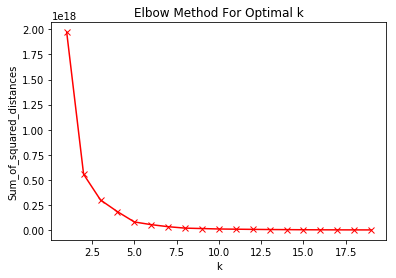

In [218]:
plt.plot(K, Sum_of_squared_distances, 'rx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [219]:
kmeans = KMeans(n_clusters=2,random_state = 131)  
kmeans_model = kmeans.fit(X_pca) 
labels_pred =  kmeans.predict(X_pca)
labels = kmeans_model.labels_

In [220]:
metrics.homogeneity_score(y, labels_pred)

0.00012538750126451557

In [221]:
metrics.completeness_score(y, labels_pred) 

0.06128531641784994

In [222]:
metrics.adjusted_rand_score(y, labels_pred)

-4.88598749635902e-05

In [223]:
metrics.adjusted_mutual_info_score(y, labels_pred)

0.00010588670583884097

In [ ]:
metrics.silhouette_score(X_pca, labels, metric='euclidean')

In [ ]:
# EM after using PCA

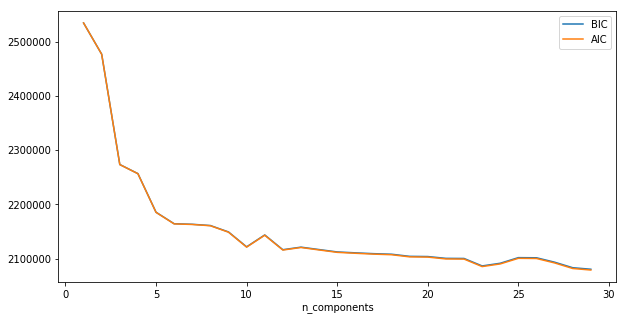

In [20]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GMM
n_components = np.arange(1, 30)
models = [GMM(n, covariance_type='full', random_state=0).fit(X_pca)
          for n in n_components]

plt.plot(n_components, [m.bic(X_pca) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_pca) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [23]:
gmm = GMM(n_components=20).fit(data_transformed)
labels_gmm = gmm.predict(data_transformed)

In [ ]:
metrics.homogeneity_score(y, labels_gmm)

In [ ]:
metrics.completeness_score(y, labels_gmm)

In [ ]:
metrics.adjusted_rand_score(y, labels_gmm)

In [ ]:
metrics.adjusted_mutual_info_score(y, labels_gmm)

In [ ]:
metrics.silhouette_score(X_pca, labels_gmm, metric='euclidean')

# K means after ICA

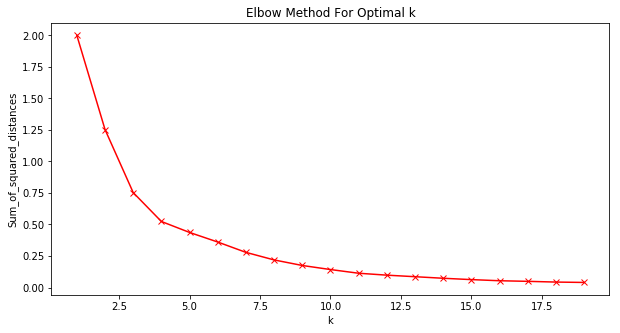

In [45]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_ICA)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'rx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=4,random_state = 131)  
kmeans_model = kmeans.fit(X_ICA) 
labels_pred =  kmeans.predict(X_ICA)

In [47]:
metrics.homogeneity_score(y, labels_pred)

0.02250779036162242

In [ ]:
metrics.silhouette_score(X_ICA, labels_pred, metric='euclidean')

# K means after RP

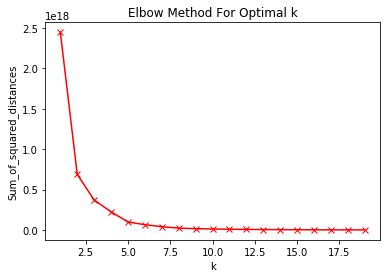

In [8]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_grd)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'rx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=2,random_state = 131)  
kmeans_model = kmeans.fit(X_grd) 
labels_pred =  kmeans.predict(X_grd)

In [10]:
metrics.homogeneity_score(y, labels_pred)

0.00012538750126451557

In [11]:
metrics.silhouette_score(X_grd, labels_pred, metric='euclidean')

KeyboardInterrupt: 

# EM after ICA

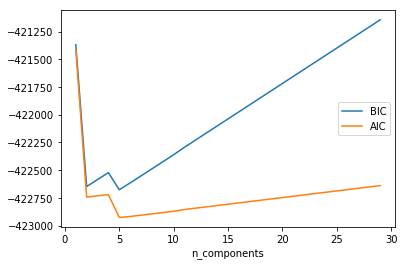

In [18]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GMM
n_components = np.arange(1, 30)
models = [GMM(n, covariance_type='full', random_state=0).fit(X_ICA)
          for n in n_components]

plt.plot(n_components, [m.bic(X_ICA) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_ICA) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [20]:
gmm = GMM(n_components=5).fit(X_ICA)
labels_gmm = gmm.predict(X_ICA)

In [21]:
metrics.homogeneity_score(y, labels_gmm)

0.0001256906914785094

In [ ]:
metrics.silhouette_score(X_ICA, labels_gmm, metric='euclidean')

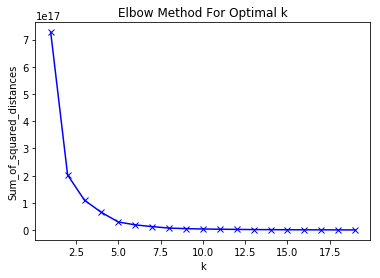

In [79]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_grd)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# EM after applying RP

In [12]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GMM
n_components = np.arange(1, 30)
models = [GMM(n, covariance_type='full', random_state=0).fit(X_grd)
          for n in n_components]

plt.plot(n_components, [m.bic(X_grd) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_grd) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

ValueError: 'covars' must be symmetric, positive-definite

In [6]:
# Neural Network implementation

In [14]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(10, activation='tanh', kernel_initializer='random_normal', input_dim=53))
# #Second  Hidden Layer
classifier.add(Dense(10, activation='tanh', kernel_initializer='random_normal'))
# # #Third  Hidden Layer
#classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [15]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [16]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [17]:
#Fitting the data to the training dataset
model_2 =classifier.fit(x_train,y_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 29364 samples, validate on 12585 samples
Epoch 1/30
29364/29364 [==============================] - 1s 41us/step - loss: 0.5139 - acc: 0.7438 - val_loss: 0.4593 - val_acc: 0.7917
Epoch 2/30
29364/29364 [==============================] - 1s 34us/step - loss: 0.4515 - acc: 0.7924 - val_loss: 0.4459 - val_acc: 0.7993
Epoch 3/30
29364/29364 [==============================] - 1s 30us/step - loss: 0.4418 - acc: 0.8000 - val_loss: 0.4405 - val_acc: 0.8019
Epoch 4/30
29364/29364 [==============================] - 1s 29us/step - loss: 0.4375 - acc: 0.8047 - val_loss: 0.4337 - val_acc: 0.8087
Epoch 5/30
29364/29364 [==============================] - 1s 30us/step - loss: 0.4334 - acc: 0.8050 - val_loss: 0.4319 - val_acc: 0.8060
Epoch 6/30
29364/29364 [==============================] - 1s 30us/step - loss: 0.4282 - acc: 0.8100 - val_loss: 0.4308 - val_acc: 0.8112
Epoch 7/30
29364/29364 [==============================] - 1s 30us/step - loss: 0

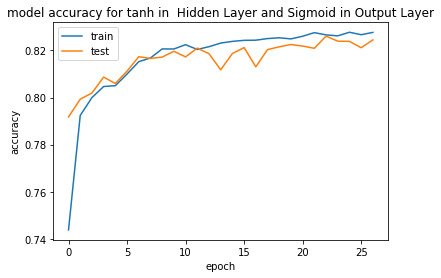

In [23]:
plt.plot(model_2.history['acc'])
plt.plot(model_2.history['val_acc'])
plt.title('model accuracy for tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

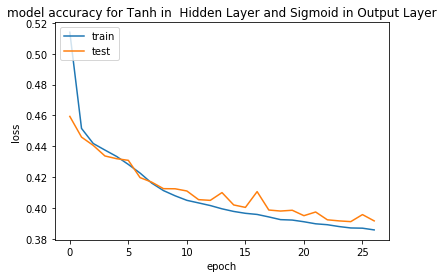

In [24]:
plt.plot(model_2.history['loss'])
plt.plot(model_2.history['val_loss'])
plt.title('model accuracy for Tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
y_pred=classifier.predict(x_test)
y_pred =(y_pred>0.5)

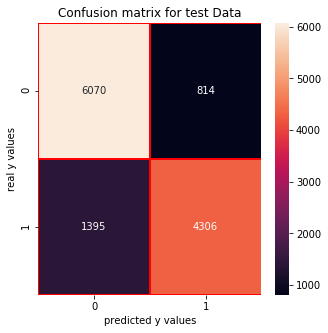

In [22]:
cm_nn_1 = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn_1,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion matrix for test Data")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.30)  


In [30]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(10, activation='tanh', kernel_initializer='random_normal', input_dim=2))
# #Second  Hidden Layer
classifier.add(Dense(10, activation='tanh', kernel_initializer='random_normal'))
# # #Third  Hidden Layer
#classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [31]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [32]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [33]:
#Fitting the data to the training dataset
model_2 =classifier.fit(x_train,y_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x_test, y_test))

Train on 29364 samples, validate on 12585 samples
Epoch 1/30
29364/29364 [==============================] - 2s 53us/step - loss: 0.6603 - acc: 0.6267 - val_loss: 0.6556 - val_acc: 0.6331
Epoch 2/30
29364/29364 [==============================] - 1s 41us/step - loss: 0.6564 - acc: 0.6322 - val_loss: 0.6551 - val_acc: 0.6347
Epoch 3/30
29364/29364 [==============================] - 1s 43us/step - loss: 0.6562 - acc: 0.6326 - val_loss: 0.6554 - val_acc: 0.6347
Epoch 4/30
29364/29364 [==============================] - 1s 42us/step - loss: 0.6560 - acc: 0.6326 - val_loss: 0.6547 - val_acc: 0.6347
Epoch 5/30
29364/29364 [==============================] - 1s 42us/step - loss: 0.6561 - acc: 0.6326 - val_loss: 0.6546 - val_acc: 0.6347
Epoch 6/30
29364/29364 [==============================] - 1s 42us/step - loss: 0.6560 - acc: 0.6326 - val_loss: 0.6546 - val_acc: 0.6347
Epoch 7/30
29364/29364 [==============================] - 1s 43us/step - loss: 0.6561 - acc: 0.6326 - val_loss: 0.6546 - val_acc

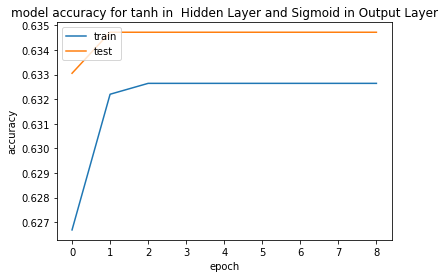

In [34]:
plt.plot(model_2.history['acc'])
plt.plot(model_2.history['val_acc'])
plt.title('model accuracy for tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

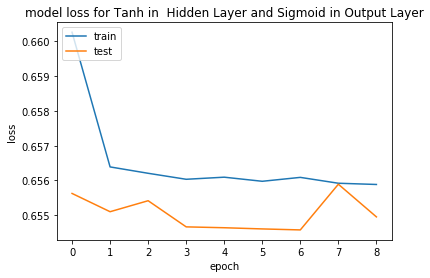

In [38]:
plt.plot(model_2.history['loss'])
plt.plot(model_2.history['val_loss'])
plt.title('model loss for Tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
y_pred=classifier.predict(x_test)
y_pred =(y_pred>0.5)

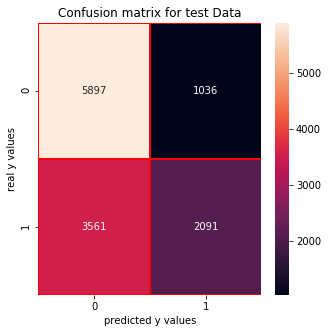

In [37]:
cm_nn_1 = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn_1,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion matrix for test Data")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X_ICA, y, test_size = 0.30)  


In [14]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(10, activation='tanh', kernel_initializer='random_normal', input_dim=2))
# #Second  Hidden Layer
classifier.add(Dense(10, activation='tanh', kernel_initializer='random_normal'))
# # #Third  Hidden Layer
#classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [16]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [17]:
#Fitting the data to the training dataset
model_2 =classifier.fit(x_train,y_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 29364 samples, validate on 12585 samples
Epoch 1/30
29364/29364 [==============================] - 2s 76us/step - loss: 0.6892 - acc: 0.5461 - val_loss: 0.6881 - val_acc: 0.5484
Epoch 2/30
29364/29364 [==============================] - 2s 57us/step - loss: 0.6880 - acc: 0.5463 - val_loss: 0.6862 - val_acc: 0.5507
Epoch 3/30
29364/29364 [==============================] - 1s 50us/step - loss: 0.6812 - acc: 0.5648 - val_loss: 0.6727 - val_acc: 0.6308
Epoch 4/30
29364/29364 [==============================] - 2s 54us/step - loss: 0.6608 - acc: 0.6145 - val_loss: 0.6487 - val_acc: 0.6257
Epoch 5/30
29364/29364 [==============================] - 2s 55us/step - loss: 0.6523 - acc: 0.6340 - val_loss: 0.6461 - val_acc: 0.6302
Epoch 6/30
29364/29364 [==============================] - 2s 58us/step - loss: 0.6499 - acc: 0.6374 - val_loss: 0.6435 - val_acc: 0.6408
Epoch 7/30
29364/29364 [==============================] - 1s 51us/step - loss: 0

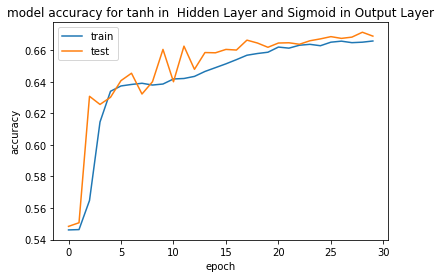

In [18]:
plt.plot(model_2.history['acc'])
plt.plot(model_2.history['val_acc'])
plt.title('model accuracy for tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

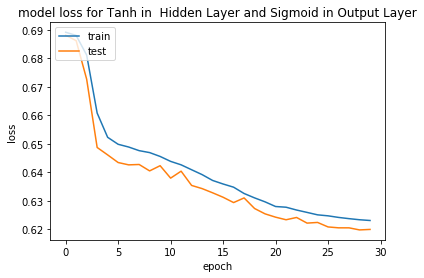

In [19]:
plt.plot(model_2.history['loss'])
plt.plot(model_2.history['val_loss'])
plt.title('model loss for Tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

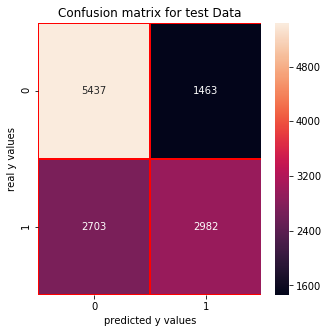

In [21]:
y_pred=classifier.predict(x_test)
y_pred =(y_pred>0.5)
cm_nn_1 = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn_1,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion matrix for test Data")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [81]:
x_train, x_test, y_train, y_test = train_test_split(X_grd, y, test_size = 0.30)  


In [82]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(10, activation='tanh', kernel_initializer='random_normal', input_dim=2))
# #Second  Hidden Layer
classifier.add(Dense(10, activation='tanh', kernel_initializer='random_normal'))
# # #Third  Hidden Layer
#classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [83]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [84]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [85]:
#Fitting the data to the training dataset
model_2 =classifier.fit(x_train,y_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x_test, y_test))

Train on 29364 samples, validate on 12585 samples
Epoch 1/30
29364/29364 [==============================] - 3s 118us/step - loss: 0.6890 - acc: 0.5446 - val_loss: 0.6882 - val_acc: 0.5504
Epoch 2/30
29364/29364 [==============================] - 2s 76us/step - loss: 0.6885 - acc: 0.5453 - val_loss: 0.6883 - val_acc: 0.5504
Epoch 3/30
29364/29364 [==============================] - 2s 76us/step - loss: 0.6887 - acc: 0.5447 - val_loss: 0.6877 - val_acc: 0.5504
Epoch 4/30
29364/29364 [==============================] - 2s 77us/step - loss: 0.6879 - acc: 0.5492 - val_loss: 0.6869 - val_acc: 0.5554
Epoch 5/30
29364/29364 [==============================] - 2s 79us/step - loss: 0.6874 - acc: 0.5482 - val_loss: 0.6871 - val_acc: 0.5484
Epoch 6/30
29364/29364 [==============================] - 2s 79us/step - loss: 0.6875 - acc: 0.5491 - val_loss: 0.6872 - val_acc: 0.5467


# K means neural Network

In [55]:
x = labels_pred
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)  

In [56]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(10, activation='tanh', kernel_initializer='random_normal', input_dim=1))
# #Second  Hidden Layer
classifier.add(Dense(10, activation='tanh', kernel_initializer='random_normal'))
# # #Third  Hidden Layer
#classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [57]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [58]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]


In [59]:
#Fitting the data to the training dataset
model_2 =classifier.fit(x_train,y_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x_test, y_test))

Train on 29364 samples, validate on 12585 samples
Epoch 1/30
29364/29364 [==============================] - 2s 73us/step - loss: 0.6891 - acc: 0.5468 - val_loss: 0.6901 - val_acc: 0.5443
Epoch 2/30
29364/29364 [==============================] - 2s 57us/step - loss: 0.6887 - acc: 0.5478 - val_loss: 0.6894 - val_acc: 0.5443
Epoch 3/30
29364/29364 [==============================] - 2s 57us/step - loss: 0.6887 - acc: 0.5478 - val_loss: 0.6897 - val_acc: 0.5443
Epoch 4/30
29364/29364 [==============================] - 2s 59us/step - loss: 0.6887 - acc: 0.5478 - val_loss: 0.6893 - val_acc: 0.5443
Epoch 5/30
29364/29364 [==============================] - 2s 60us/step - loss: 0.6886 - acc: 0.5478 - val_loss: 0.6894 - val_acc: 0.5443
Epoch 6/30
29364/29364 [==============================] - 2s 55us/step - loss: 0.6886 - acc: 0.5478 - val_loss: 0.6893 - val_acc: 0.5443
Epoch 7/30
29364/29364 [==============================] - 2s 60us/step - loss: 0.6887 - acc: 0.5478 - val_loss: 0.6895 - val_acc

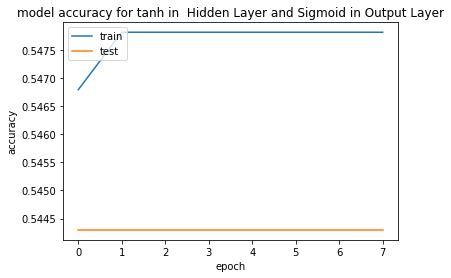

In [60]:
plt.plot(model_2.history['acc'])
plt.plot(model_2.history['val_acc'])
plt.title('model accuracy for tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

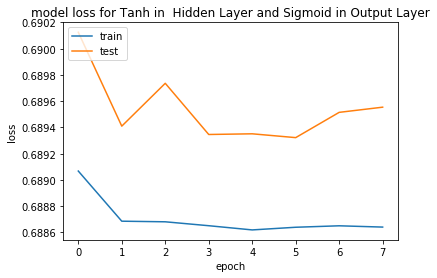

In [61]:
plt.plot(model_2.history['loss'])
plt.plot(model_2.history['val_loss'])
plt.title('model loss for Tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

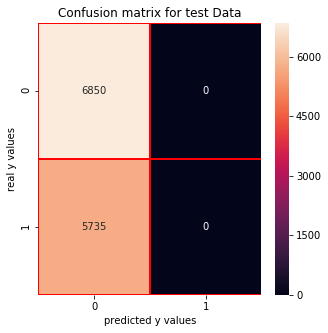

In [62]:
y_pred=classifier.predict(x_test)
y_pred =(y_pred>0.5)
cm_nn_1 = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn_1,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion matrix for test Data")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

# Dataset 2

In [16]:
Dataset2 = pd.read_csv("Admission_Predict.csv")
Dataset2.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Work Exp,Age,Volunteer/Leadership,Sports,Certificates/Awards,Languages,NGO,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,8,29,1,1,21,2,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0,29,1,1,25,3,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,10,23,1,1,13,5,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,8,22,1,1,16,6,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,6,20,0,1,4,2,1,0.65


In [17]:
Dataset2 = pd.DataFrame(Dataset2)
Dataset2.columns = Dataset2.columns.to_series().apply(lambda x: x.strip())
Dataset2['Admit'] = [1 if each > 0.60 else 0 for each in Dataset2['Chance of Admit']]
Dataset2.reset_index()
y2 = Dataset2['Admit'].values
X2 = Dataset2.drop(['Admit','Chance of Admit'],axis = 1)
N_rows = Dataset2.shape[0] 
Dataset2.index

RangeIndex(start=0, stop=5203, step=1)

In [18]:
mms = MinMaxScaler()
mms.fit(X2)
data_transformed_2 = mms.transform(X2)

# K means Implementation

In [25]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,40)
for k in K:
    km = KMeans(n_clusters=k,random_state = 131)
    km = km.fit(data_transformed_2)
    Sum_of_squared_distances.append(km.inertia_)

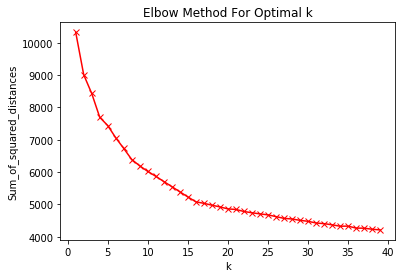

In [26]:
plt.plot(K, Sum_of_squared_distances, 'rx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [27]:
kmeans = KMeans(n_clusters=16,random_state = 131)  
kmeans_model = kmeans.fit(data_transformed_2) 
labels_pred =  kmeans.predict(data_transformed_2)
labels = kmeans_model.labels_


In [66]:
from sklearn import metrics
metrics.homogeneity_score(y2, labels_pred)

0.016522091804848274

In [67]:
metrics.completeness_score(y2, labels_pred) 

0.004103919580855248

In [68]:
metrics.adjusted_rand_score(y2, labels_pred)

0.0024242157454416186

In [69]:
metrics.adjusted_mutual_info_score(y2, labels_pred)

0.003584076409034368

In [70]:
metrics.normalized_mutual_info_score(y2, labels_pred)  

0.008234399557624396

In [71]:
metrics.silhouette_score(data_transformed_2, labels, metric='euclidean')

0.18885607280697075

In [58]:
# EM implementation - Dataset2

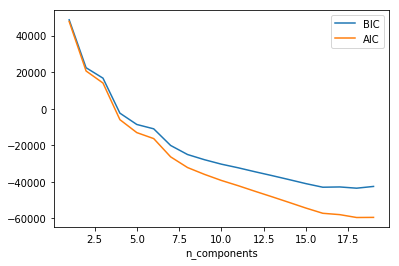

In [76]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GMM
n_components = np.arange(1, 20)
models = [GMM(n, covariance_type='full', random_state=131).fit(data_transformed_2)
          for n in n_components]

plt.plot(n_components, [m.bic(data_transformed_2) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data_transformed_2) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [73]:
gmm = GMM(n_components=12).fit(data_transformed_2)
labels_gmm = gmm.predict(data_transformed_2)

In [74]:
metrics.completeness_score(y2, labels_gmm) 

0.0037518001736421723

In [75]:
metrics.adjusted_rand_score(y2, labels_gmm)

0.003063565671485181

In [76]:
metrics.adjusted_mutual_info_score(y2, labels_gmm)

0.003319794159833083

In [78]:
metrics.silhouette_score(data_transformed_2, labels_gmm, metric='euclidean')

0.14504329254201986

In [79]:
metrics.homogeneity_score(y2, labels_pred)

0.016522091804848274

# Decsion Tree Implementation

In [19]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.30)

scalerX = MinMaxScaler(feature_range=(0, 1))
x2_train[x2_train.columns] = scalerX.fit_transform(x2_train[x2_train.columns])
x2_test[x2_test.columns] = scalerX.transform(x2_test[x2_test.columns])

In [106]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy",random_state=0)
dtc.fit(x2_train,y2_train)
print("score: ", accuracy_score(y2_test,dtc.predict(x2_test)))

score:  0.5547725816784113


In [84]:
imp_features=dict(zip(x2.columns, dtc.feature_importances_))
for key, value in sorted(imp_features.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

Research: 0.009047190058519661
Sports: 0.01521228845392787
NGO: 0.02007086064261251
University Rating: 0.03579434045224123
Languages: 0.038460184414685204
Age: 0.0402789054199653
Work Exp: 0.04186932013881087
Volunteer/Leadership: 0.04394635498553118
Certificates/Awards: 0.0745555710691504
TOEFL Score: 0.08391482946213918
SOP: 0.08889481728107745
GRE Score: 0.10494696170850867
LOR: 0.10837163912652956
CGPA: 0.13458671516338377
Serial No.: 0.16005002162291704


# PCA Implementation

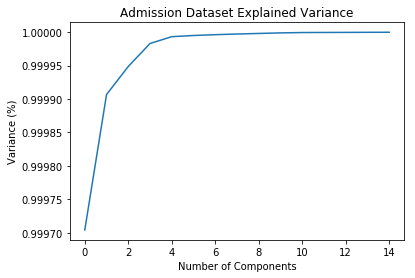

In [30]:
from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
pca = PCA().fit(X2)
#X_pca = pca.transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Admission Dataset Explained Variance')
plt.show()

In [31]:
pca = PCA(n_components=5)
X2_pca = pca.fit_transform(X2)

In [32]:
print("original shape:   ", X2.shape)
print("transformed shape:", X2_pca.shape)

original shape:    (5203, 15)
transformed shape: (5203, 5)


# ICA implementation

In [80]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
ica = FastICA(n_components=5,random_state=131)
X2_ICA = ica.fit_transform(X2_pca) 


In [81]:
print("original shape:   ", X2.shape)
print("transformed shape:", X2_ICA.shape)

original shape:    (5203, 15)
transformed shape: (5203, 5)


# RP Implementation

In [20]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
johnson_lindenstrauss_min_dim(n_samples=5203, eps=[0.9,0.8,0.5, 0.1, 0.01])

array([   211,    229,    410,   7334, 689153])

In [21]:
from sklearn.random_projection import GaussianRandomProjection
GRP = GaussianRandomProjection(n_components = 15,eps = 0.5, random_state=131)
GRP.fit(X2)
X_grd = GRP.transform(X2)
print("original shape:   ", X2.shape)
print("transformed shape:", X_grd.shape)

original shape:    (5203, 15)
transformed shape: (5203, 15)


# K Means after implementing PCA

In [63]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X2_pca)
    Sum_of_squared_distances.append(km.inertia_)

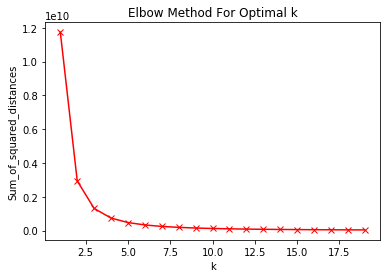

In [64]:
plt.plot(K, Sum_of_squared_distances, 'rx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [71]:
kmeans = KMeans(n_clusters=2,random_state = 131)  
kmeans_model = kmeans.fit(X2_pca) 
labels_pred =  kmeans.predict(X2_pca)
labels = kmeans_model.labels_

In [72]:
metrics.homogeneity_score(y2, labels_pred)

0.007513255052249063

In [73]:
metrics.silhouette_score(X2_pca, labels_pred, metric='euclidean')

0.6257768544308244

# EM after PCA

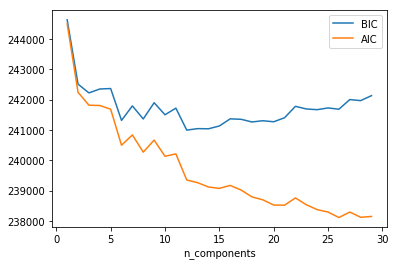

In [75]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GMM
n_components = np.arange(1, 30)
models = [GMM(n, covariance_type='full', random_state=0).fit(X2_pca)
          for n in n_components]

plt.plot(n_components, [m.bic(X2_pca) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X2_pca) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [77]:
gmm = GMM(n_components=12).fit(X2_pca)
labels_gmm = gmm.predict(X2_pca)

In [78]:
metrics.homogeneity_score(y2, labels_gmm)

0.04552999817496758

In [79]:
metrics.silhouette_score(X2_pca, labels_gmm, metric='euclidean')

0.26030702577833353

# K means after ICA

In [84]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X2_ICA)
    Sum_of_squared_distances.append(km.inertia_)

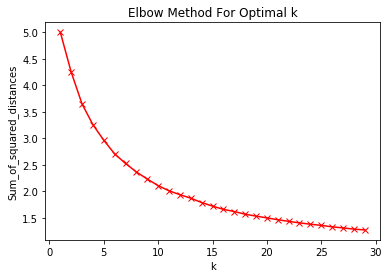

In [85]:
plt.plot(K, Sum_of_squared_distances, 'rx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [86]:
kmeans = KMeans(n_clusters=7,random_state = 131)  
kmeans_model = kmeans.fit(X2_ICA) 
labels_pred =  kmeans.predict(X2_ICA)
labels = kmeans_model.labels_

In [87]:
metrics.homogeneity_score(y2, labels_pred)

0.010648443696027044

In [89]:
metrics.silhouette_score(X2_ICA, labels, metric='euclidean')

0.17610416378390617

# EM after ICA

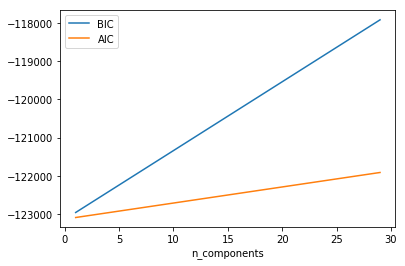

In [90]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GMM
n_components = np.arange(1, 30)
models = [GMM(n, covariance_type='full', random_state=0).fit(X2_ICA)
          for n in n_components]

plt.plot(n_components, [m.bic(X2_ICA) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X2_ICA) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [95]:
gmm = GMM(n_components=3).fit(X2_ICA)
labels_gmm = gmm.predict(X2_ICA)

In [96]:
metrics.homogeneity_score(y2, labels_gmm)

1.6149939323738716e-16

# K means after RP

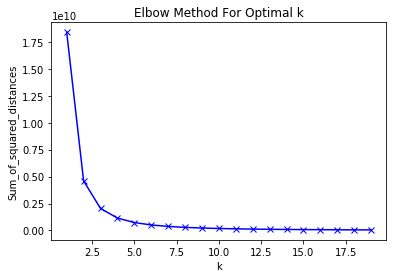

In [22]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_grd)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Neural Network

In [161]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.30)


In [162]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal', input_dim=15))
#Second  Hidden Layer
classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal'))
#Output Layer

classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [163]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [164]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]



In [165]:
#Fitting the data to the training dataset
model =classifier.fit(x2_train,y2_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x2_test, y2_test))

Train on 3642 samples, validate on 1561 samples
Epoch 1/30
3642/3642 [==============================] - 1s 213us/step - loss: 0.6877 - acc: 0.5794 - val_loss: 0.6814 - val_acc: 0.6150
Epoch 2/30
3642/3642 [==============================] - 0s 33us/step - loss: 0.6776 - acc: 0.6060 - val_loss: 0.6749 - val_acc: 0.6015
Epoch 3/30
3642/3642 [==============================] - 0s 36us/step - loss: 0.6734 - acc: 0.6120 - val_loss: 0.6700 - val_acc: 0.6105
Epoch 4/30
3642/3642 [==============================] - 0s 34us/step - loss: 0.6697 - acc: 0.6101 - val_loss: 0.6681 - val_acc: 0.6124
Epoch 5/30
3642/3642 [==============================] - 0s 34us/step - loss: 0.6675 - acc: 0.6079 - val_loss: 0.6636 - val_acc: 0.6079
Epoch 6/30
3642/3642 [==============================] - 0s 34us/step - loss: 0.6660 - acc: 0.6076 - val_loss: 0.6639 - val_acc: 0.6105
Epoch 7/30
3642/3642 [==============================] - 0s 32us/step - loss: 0.6641 - acc: 0.6090 - val_loss: 0.6601 - val_acc: 0.6143
Epoch 

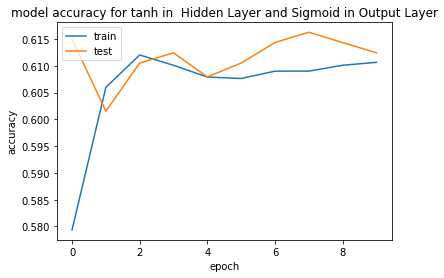

In [166]:
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy for tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

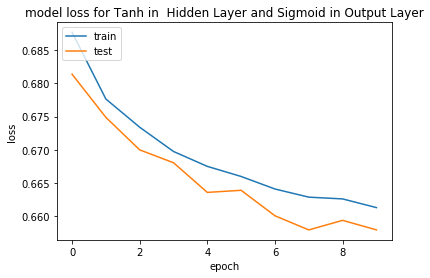

In [167]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss for Tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

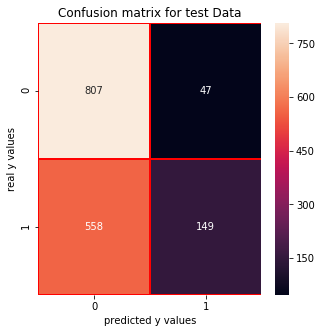

In [168]:
y_pred=classifier.predict(x2_test)
y_pred =(y_pred>0.5)
cm_nn_1 = confusion_matrix(y2_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn_1,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion matrix for test Data")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

# Neural Network After PCA

In [177]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2_pca, y2, test_size = 0.30)


In [178]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal', input_dim=5))
#Second  Hidden Layer
classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [179]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [180]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]


In [181]:
#Fitting the data to the training dataset
model =classifier.fit(x2_train,y2_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x2_test, y2_test))

Train on 3642 samples, validate on 1561 samples
Epoch 1/30
3642/3642 [==============================] - 1s 234us/step - loss: 0.6901 - acc: 0.5395 - val_loss: 0.6827 - val_acc: 0.5791
Epoch 2/30
3642/3642 [==============================] - 0s 33us/step - loss: 0.6870 - acc: 0.5373 - val_loss: 0.6780 - val_acc: 0.5791
Epoch 3/30
3642/3642 [==============================] - 0s 35us/step - loss: 0.6860 - acc: 0.5376 - val_loss: 0.6762 - val_acc: 0.5772
Epoch 4/30
3642/3642 [==============================] - 0s 35us/step - loss: 0.6856 - acc: 0.5453 - val_loss: 0.6754 - val_acc: 0.5766
Epoch 5/30
3642/3642 [==============================] - 0s 36us/step - loss: 0.6852 - acc: 0.5502 - val_loss: 0.6750 - val_acc: 0.5798
Epoch 6/30
3642/3642 [==============================] - 0s 36us/step - loss: 0.6852 - acc: 0.5404 - val_loss: 0.6749 - val_acc: 0.5778
Epoch 7/30
3642/3642 [==============================] - 0s 36us/step - loss: 0.6850 - acc: 0.5450 - val_loss: 0.6751 - val_acc: 0.5701
Epoch 

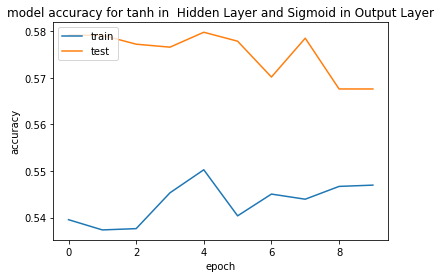

In [182]:
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy for tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

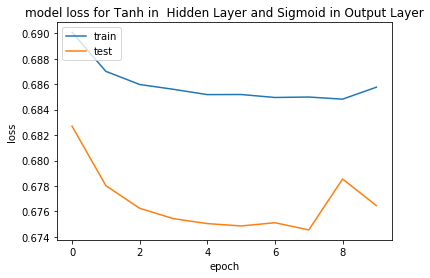

In [183]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss for Tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

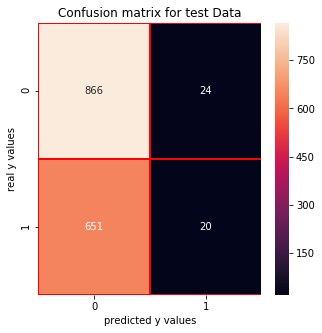

In [184]:
y_pred=classifier.predict(x2_test)
y_pred =(y_pred>0.5)
cm_nn_1 = confusion_matrix(y2_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn_1,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion matrix for test Data")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

# Neural Network After ICA

In [185]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2_ICA, y2, test_size = 0.30)


In [186]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal', input_dim=5))
#Second  Hidden Layer
classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [187]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [188]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]


In [189]:
#Fitting the data to the training dataset
model =classifier.fit(x2_train,y2_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x2_test, y2_test))

Train on 3642 samples, validate on 1561 samples
Epoch 1/30
3642/3642 [==============================] - 1s 242us/step - loss: 0.6912 - acc: 0.5508 - val_loss: 0.6889 - val_acc: 0.5567
Epoch 2/30
3642/3642 [==============================] - 0s 34us/step - loss: 0.6885 - acc: 0.5519 - val_loss: 0.6869 - val_acc: 0.5567
Epoch 3/30
3642/3642 [==============================] - 0s 36us/step - loss: 0.6879 - acc: 0.5519 - val_loss: 0.6868 - val_acc: 0.5567
Epoch 4/30
3642/3642 [==============================] - 0s 35us/step - loss: 0.6877 - acc: 0.5519 - val_loss: 0.6865 - val_acc: 0.5567
Epoch 5/30
3642/3642 [==============================] - 0s 35us/step - loss: 0.6876 - acc: 0.5519 - val_loss: 0.6865 - val_acc: 0.5567
Epoch 6/30
3642/3642 [==============================] - 0s 37us/step - loss: 0.6876 - acc: 0.5519 - val_loss: 0.6863 - val_acc: 0.5567
Epoch 7/30
3642/3642 [==============================] - 0s 36us/step - loss: 0.6875 - acc: 0.5519 - val_loss: 0.6863 - val_acc: 0.5567
Epoch 

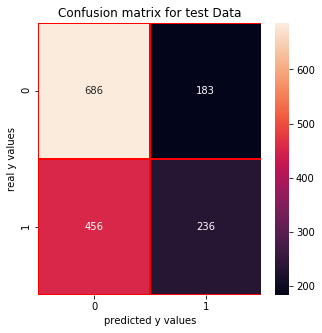

In [190]:
y_pred=classifier.predict(x2_test)
y_pred =(y_pred>0.5)
cm_nn_1 = confusion_matrix(y2_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn_1,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion matrix for test Data")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

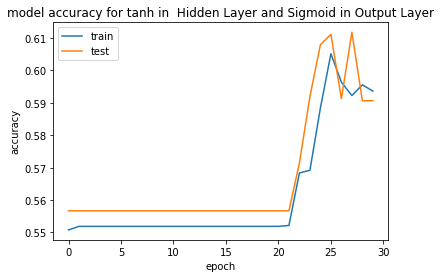

In [191]:
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy for tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

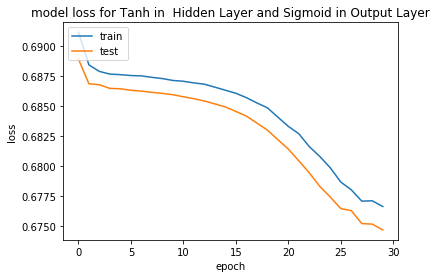

In [192]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss for Tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [203]:
x2_train, x2_test, y2_train, y2_test = train_test_split(labels_pred, y2, test_size = 0.30)

In [204]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal', input_dim=1))
#Second  Hidden Layer
classifier.add(Dense(4, activation='tanh', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [205]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [206]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]


In [207]:
#Fitting the data to the training dataset
model =classifier.fit(x2_train,y2_train,epochs=30,callbacks=callbacks,batch_size =32,validation_data=(x2_test, y2_test))

Train on 3642 samples, validate on 1561 samples
Epoch 1/30
3642/3642 [==============================] - 1s 267us/step - loss: 0.6912 - acc: 0.5538 - val_loss: 0.6903 - val_acc: 0.5471
Epoch 2/30
3642/3642 [==============================] - 0s 35us/step - loss: 0.6881 - acc: 0.5560 - val_loss: 0.6897 - val_acc: 0.5471
Epoch 3/30
3642/3642 [==============================] - 0s 44us/step - loss: 0.6871 - acc: 0.5560 - val_loss: 0.6902 - val_acc: 0.5471
Epoch 4/30
3642/3642 [==============================] - 0s 43us/step - loss: 0.6871 - acc: 0.5560 - val_loss: 0.6902 - val_acc: 0.5471


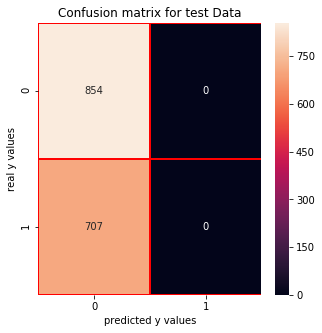

In [208]:
y_pred=classifier.predict(x2_test)
y_pred =(y_pred>0.5)
cm_nn_1 = confusion_matrix(y2_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nn_1,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Confusion matrix for test Data")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

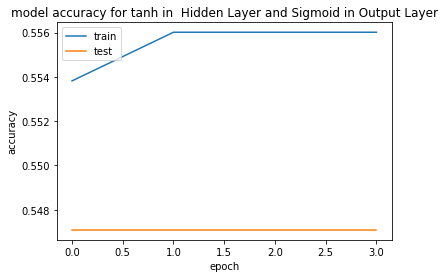

In [209]:
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy for tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

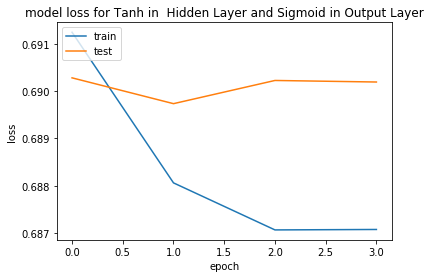

In [210]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss for Tanh in  Hidden Layer and Sigmoid in Output Layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()